In [63]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
%matplotlib inline

In [134]:

lamb=2; mu=1; Xzero=1
T=1; N=2**9
dt=float(T)/N



R=1; Dt=R*dt; L=N/R; 

Xem=np.zeros(int(L)); Xem=np.insert(Xem, 0, Xzero)
M=len(Xem)
Xerr_strong=np.zeros((M,5));
Xerr_weak=np.zeros((M,5));

t=np.linspace(0,T,N+1)


for s in range(M):
    Dw=np.sqrt(dt)*np.random.randn(1,N)
    W=np.cumsum(Dw)
    Xtrue=Xzero*np.exp((-lamb)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)
    for p in range(0,5):
        R=2**p; L=N/R; Dt=R*dt
        for j in range(1, int(L)+1):
            Winc=np.sum(Dw[0][range(R*(j-1),R*j)])
            Xem[j] = Xem[j-1] + Dt*lamb*Xem[j-1]+ mu*Winc*Xem[j-1]
        Xerr_strong[:, p]=np.abs(Xem-Xtrue)
fig = plt.figure(figsize=(10, 8))



<Figure size 720x576 with 0 Axes>

In [132]:
Xerr_strong

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.97206489, 0.97206489, 0.97206489, 0.97206489, 0.97206489],
       [0.98906166, 0.98906166, 0.98906166, 0.98906166, 0.98906166],
       ...,
       [0.64475133, 0.64475133, 0.64475133, 0.64475133, 0.64475133],
       [0.62568326, 0.62568326, 0.62568326, 0.62568326, 0.62568326],
       [0.63327909, 0.63327909, 0.63327909, 0.63327909, 0.63327909]])

In [129]:
np.mean(Xerr_strong, 0)

array([1.88788996, 2.25455544, 2.44991252, 2.56386424, 2.62955259])

In [73]:
np.mean(Xerr_strong, 0)

array([0.98892349, 0.97166284, 0.96216739, 0.96358404, 0.96330077])

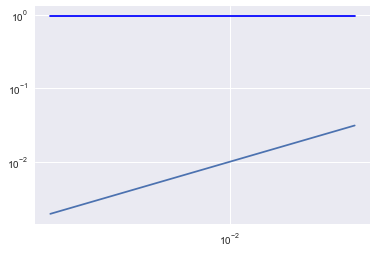

In [133]:
Dtvals=np.power(float(2),[x-10 for x in range(1,6)])
plt.loglog(Dtvals, np.mean(Xerr_strong, 0), '-b')
plt.loglog(Dtvals,Dtvals)

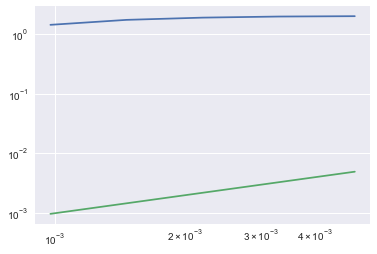

In [126]:
Dtvals=dt*(np.power(1.5,range(5))) 
plt.loglog(Dtvals,np.mean(Xerr_strong, 0))
plt.loglog(Dtvals, Dtvals)
#plt.axis([1e-4, 1e-1, 1e-3, 2.5])

In [127]:
Dtvals

array([0.00097656, 0.00146484, 0.00219727, 0.0032959 , 0.00494385])